# Regression

Here I will outline regression models including ols and glm with python

In [3]:
import pandas as pd
import numpy as np

import statsmodels.api as sm # statmodels
import statsmodels.formula.api as smf # stat models formula
from scipy import stats

from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.graphics.api import abline_plot
from statsmodels import graphics
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets 

Information on summary printout from regression models:

**Model Characteristics**
- R-squared:
    - Proportion of variance in dependent variable explained by independent variables
- Adj. R-squared:
    - Adjustment to R-squared to account for biased estimators arising due to covariance. This using a different number of degrees of freedom to prevent it, still not perfect though of course.
    - http://thestatsgeek.com/2013/10/28/r-squared-and-adjusted-r-squared/
- F-statistic/Prob (F-statistic):
    - How well the model performs with respect to random noise. The probability of getting said F-statistic if the independent variables provide zero information.
- Log-likelihood:
    - https://stackoverflow.com/questions/2343093/what-is-log-likelihood
    - How likely the presented parameters are as derived from bayesian inference of model parameters.
- Akaike’s information criterion - AIC: (−2) × ln(L) + (2×k) where, k is the number of model parameters
- Bayesian information criterion - BIC: (−2) × ln(L) + k × ln(n) where, n is the sample size.
    - The Akaike’s information criterion - AIC (Akaike, 1974) and the Bayesian information criterion - BIC (Schwarz, 1978) are measures of the goodness of fit of an estimated statistical model and can also be used for model selection. Both criteria depend on the maximized value of the likelihood function L for the estimated model. For model comparison, the model with the lowest AIC and BIC score is preferred.


**Model Diagnostics**
- https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate/
- Omnibus/Prob(Omnibus): 
    - https://stats.stackexchange.com/questions/146363/anova-omnibus-f-test
    - A test of the skewness and kurtosis of the residual. We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here.
- Skew:
    - A measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. Note that this value also drives the Omnibus. 
- Kurtosis:
    - A measure of “peakiness”, or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.
- Durbin-Watson:
    - Tests for homoscedasticity. We hope to have a value between 1 and 2. 
- Jarque-Bera/Prob(JB):
    -  Like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test with a statistic close to zero and a probability close to 1.
- Cond. No.:
    -  This test measures the sensitivity of a function’s output as compared to its input. When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30.

# Ordinary Least Squares

In [8]:
# Make fake data

# Here I construct an np.array for input into the regressional model
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))

# This handy command adds a constant for regression
# X = sm.add_constant(X)

# Define y_true with beta_true
beta = [0.5, 0.5, -0.02, 5.]
y_true = np.dot(X, beta)

# Define y as y_true + noise
y = y_true + sig * np.random.normal(size=nsample)

print('X has shape: {}'.format(X.shape))
print('Y has shape: {}'.format(y.shape))

X has shape: (50, 4)
Y has shape: (50,)


In [10]:
# Stat model, ordinary least squares
res = sm.OLS(y, X).fit()
print(res.summary())
print('-------------------------------------------')
# Get useful stuff
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
print('Number of Observations: \n', res.nobs)
print('Df Residuals: \n', res.df_resid)
print('Df Model: \n', res.df_model)
print('R-squared: \n', res.rsquared)
print('Adj. R-squared: \n', res.rsquared_adj)
print('F-statistic: \n', res.fvalue)
print('Prob(F-statistic): \n', res.f_pvalue)
print('AIC: \n', res.aic)
print('BIC: \n', res.bic)

print('-------------------------------------------')

print('Parameters: \n', res.params)
print('Standard errors: \n', res.bse)
print('t-values: \n', res.tvalues)
print('Confidence Intervals: \n', res.conf_int())


print('-------------------------------------------')

print('Predicted values: \n', res.predict())
print('Fitted values: \n', res.fittedvalues)
print('Residuals: \n', res.resid)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     237.2
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           5.55e-28
Time:                        12:32:15   Log-Likelihood:                -30.178
No. Observations:                  50   AIC:                             68.36
Df Residuals:                      46   BIC:                             76.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4611      0.024     19.014      0.0

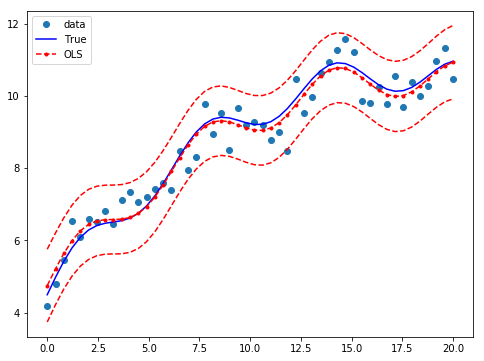

In [11]:
# Visualization of fit
# Get predictions std, and CIs at every point
prstd, iv_l, iv_u = wls_prediction_std(res)
# Plot it up
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

# Diagnostic Fits

/home/spwhite1337/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


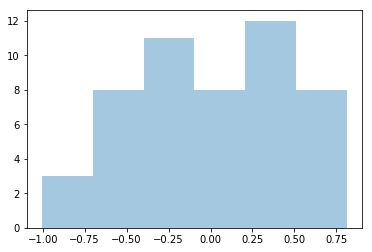

In [12]:
# Histogram of residuals
sns.distplot(res.resid, kde = False)
plt.show()

In [13]:
# Perform the Kolmogorov-Smirnov test for goodness of fit.
stats.kstest(res.resid, 'norm')

KstestResult(statistic=0.21823770140010645, pvalue=0.014307844396844072)

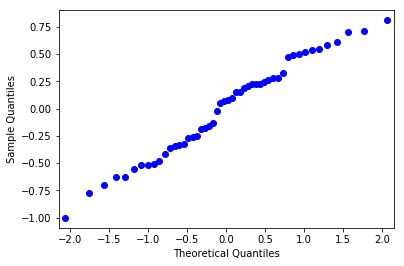

In [14]:
# qq plot
fig = sm.qqplot(res.resid)
plt.show()

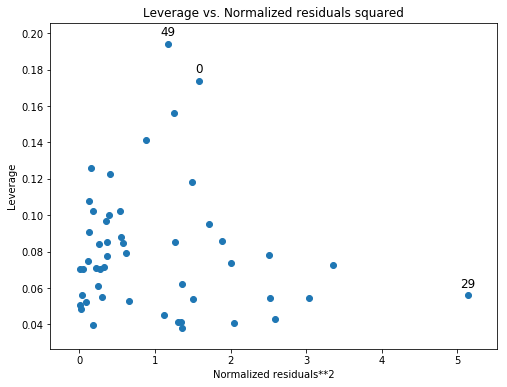

In [15]:
# Leverage vs residuals
# https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(res, ax = ax)

# Anova Table

In [18]:
stats.f_oneway(X[:,0], X[:,1])

F_onewayResult(statistic=138.22610127128087, pvalue=1.97502249752874e-20)

In [17]:
# For anova tables, I can only get them to work with smf.ols models from dataframes
df = pd.DataFrame(np.column_stack((X,y)))
df.columns = ['x1', 'x2', 'x3', 'x0', 'y']

res = smf.ols('y ~ x0 + x1 + x2 + x3', data = df).fit()
anova_table = sm.stats.anova_lm(res, typ=2)
print(anova_table)

              sum_sq    df            F        PR(>F)
x0        232.027785   1.0  1090.313438  1.106029e-33
x1         76.940701   1.0   361.549286  2.006090e-23
x2          6.411620   1.0    30.128613  1.676560e-06
x3         14.539860   1.0    68.323734  1.203307e-10
Residual    9.789183  46.0          NaN           NaN


# Generalized Linear Models

Start with a binomial response variable

In [110]:
# print(sm.datasets.star98.NOTE)

In [111]:
data = sm.datasets.star98.load()
data.exog = sm.add_constant(data.exog, prepend=False)
print(data.endog.shape)
print(data.exog.shape)

(303, 2)
(303, 21)


In [112]:
# logit link for binomial response
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.6
Date:                Tue, 06 Nov 2018   Deviance:                       4078.8
Time:                        10:16:17   Pearson chi2:                 4.05e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.000    -38.749      0.000      -0.018      -0.016
x2             0.0099      0.001     16.505      0.0

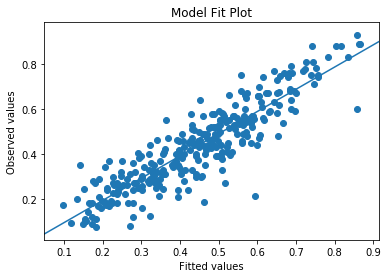

In [124]:
# Number of observations
nobs = res.nobs 
y = data.endog[:,0]/data.endog.sum(1)
# Fitted values
yhat = res.fittedvalues

# Plot it
fig, ax = plt.subplots()
ax.scatter(yhat, y)
# Get a regression line for fitted vs. true
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

Text(0.5,0,'Fitted values')

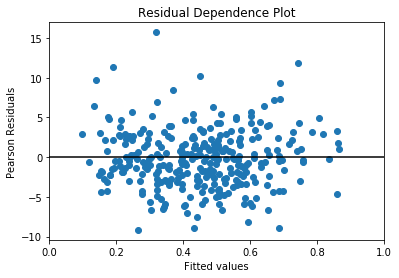

In [125]:
# Residual plot
fig, ax = plt.subplots()
ax.scatter(yhat, res.resid_pearson) # use pearson residuals for binomial
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

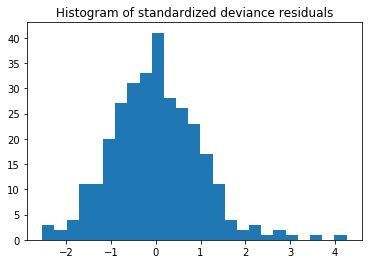

In [17]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

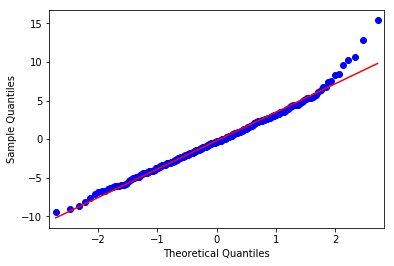

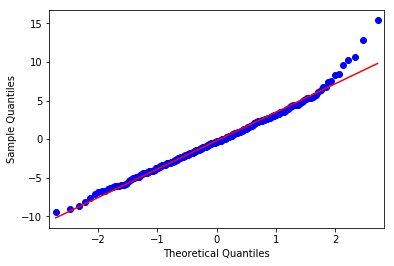

In [18]:
graphics.gofplots.qqplot(resid, line='r')

### Gamma Function for Proportional Count Response

In [19]:
data2 = sm.datasets.scotland.load()
data2.exog = sm.add_constant(data2.exog, prepend=False)
print(data2.exog[:5,:])
print(data2.endog[:5])

[[7.12000e+02 2.10000e+01 1.05000e+02 8.24000e+01 1.35660e+04 1.23000e+01
  1.49520e+04 1.00000e+00]
 [6.43000e+02 2.65000e+01 9.70000e+01 8.02000e+01 1.35660e+04 1.53000e+01
  1.70395e+04 1.00000e+00]
 [6.79000e+02 2.83000e+01 1.13000e+02 8.63000e+01 9.61100e+03 1.39000e+01
  1.92157e+04 1.00000e+00]
 [8.01000e+02 2.71000e+01 1.09000e+02 8.04000e+01 9.48300e+03 1.36000e+01
  2.17071e+04 1.00000e+00]
 [7.53000e+02 2.20000e+01 1.15000e+02 6.47000e+01 9.26500e+03 1.46000e+01
  1.65660e+04 1.00000e+00]]
[60.3 52.3 53.4 57.  68.7]


In [20]:
# With an inverse_power link function for gamma model
glm_gamma = sm.GLM(data2.endog, data2.exog, family=sm.families.Gamma())
glm_results = glm_gamma.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Tue, 06 Nov 2018   Deviance:                     0.087389
Time:                        07:59:39   Pearson chi2:                   0.0860
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.962e-05   1.62e-05      3.060      0.002    1.78e-05    8.14e-05
x2             0.0020      0.001      3.824      0.0

/home/spwhite1337/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


### GLM: Gaussian distribution with a noncanonical link

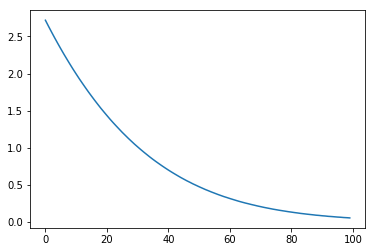

In [21]:
nobs2 = 100
x = np.arange(nobs2)
np.random.seed(54321)
X = np.column_stack((x,x**2))
X = sm.add_constant(X, prepend=False)
lny = np.exp(-(.03*x + .0001*x**2 - 1.0)) + .001 * np.random.rand(nobs2)

plt.plot(np.arange(nobs2), lny)
plt.show()

In [22]:
# With a log link function
gauss_log = sm.GLM(lny, X, family=sm.families.Gaussian(sm.families.links.log))
gauss_log_results = gauss_log.fit()
print(gauss_log_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            2
Link Function:                    log   Scale:                      1.0531e-07
Method:                          IRLS   Log-Likelihood:                 662.92
Date:                Tue, 06 Nov 2018   Deviance:                   1.0215e-05
Time:                        07:59:40   Pearson chi2:                 1.02e-05
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0300    5.6e-06  -5361.316      0.000      -0.030      -0.030
x2         -9.939e-05   1.05e-07   -951.091      0.0